## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [148]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [150]:
# Your code here
DF_raw = pd.read_csv('mapdataall.csv')
show(DF_raw)

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the **acres burned and color the bars by whether or not the incident was a calfire incident.** You will probably need to make a mask to remove very small and very large fires. **How many fires burned more than 100,000 acres? What is the largest fire in the data?**

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

1. There are 2728 observations and 23 variables.
2. fire, flood and wildfire
3. there were 19 fires over 100,000 acres. The largest fire was the park fire

In [152]:
# You will need to write some code to answer the questions.
DF_raw.shape

(2728, 23)

In [154]:
DF_raw.groupby(by='incident_type').sum()

,incident_name,incident_is_final,incident_date_last_update,incident_date_created,incident_administrative_unit,incident_administrative_unit_url,incident_county,incident_location,incident_acres_burned,incident_containment,...,incident_longitude,incident_latitude,incident_id,incident_url,incident_date_extinguished,incident_dateonly_extinguished,incident_dateonly_created,is_active,calfire_incident,notification_desired
incident_type,,,,,,,,,,,,,,,,,,,,,
Fire,Refuge FireLine FireWestwood FireLuis FireCoyo...,YYYYYYYYYYYYYYYYYYYYYYYYYYYYY,2022-10-12T08:16:36Z2021-03-31T19:09:07Z2021-0...,2021-03-27T17:02:04Z2021-03-28T14:43:24Z2021-0...,CAL FIRE/Siskiyou unitCAL FIRE Tuolumne-Calave...,0.0,SiskiyouTuolumneVenturaMercedRiversideRiversid...,Lower Klamath Lake Rd and Dorris Brownell RdSh...,221954.0,2800.0,...,-3.463121e+03,1060.805682,762d7abb-ec4e-4e50-9137-617c8445b0d10c3c5916-b...,https://www.fire.ca.gov/incidents/2021/3/27/re...,2021-03-29T17:21:30Z2021-04-05T17:24:38Z2021-0...,2021-03-292021-04-052021-04-242021-06-042021-0...,2021-03-272021-03-282021-04-042021-04-242021-0...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNN,18,0
Flood,Honey Flooding,Y,2019-07-09T13:45:23Z,2018-11-29T23:30:00Z,CAL FIRE Butte Unit,0.0,Butte,"Lower Skyway and Lower Honey Run, Between Chic...",0.0,100.0,...,-1.217738e+02,39.712170,e6b8af54-15fb-42bb-8be9-f323c9d5cc78,https://www.fire.ca.gov/incidents/2018/11/29/h...,2019-01-04T08:42:00Z,2019-01-04,2018-11-29,N,1,0
Wildfire,Pala FireSand FireWragg FireButte FireAtlas Fi...,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY...,2020-09-16T14:07:35Z2022-10-24T11:28:11Z2022-1...,2009-05-24T14:56:00Z2014-07-25T16:34:00Z2015-0...,CAL FIRE San Diego UnitCAL FIRE Amador-El Dora...,0.0,"San DiegoAmador, El DoradoNapaButteNapa, Solan...","Hwy 76 and Pala Temecula, northwest of PalaEas...",8579368.0,140412.0,...,-1.191590e+09,53900.450654,8f61f461-552d-4538-b186-35ab030da4164d07ccc3-3...,https://www.fire.ca.gov/incidents/2009/5/24/pa...,2009-05-25T00:00:00Z2014-08-02T19:15:00Z2015-0...,2009-05-252014-08-022015-08-052015-10-152018-0...,2009-05-242014-07-252015-07-222015-09-092017-1...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,920,0


**(Click Here)**



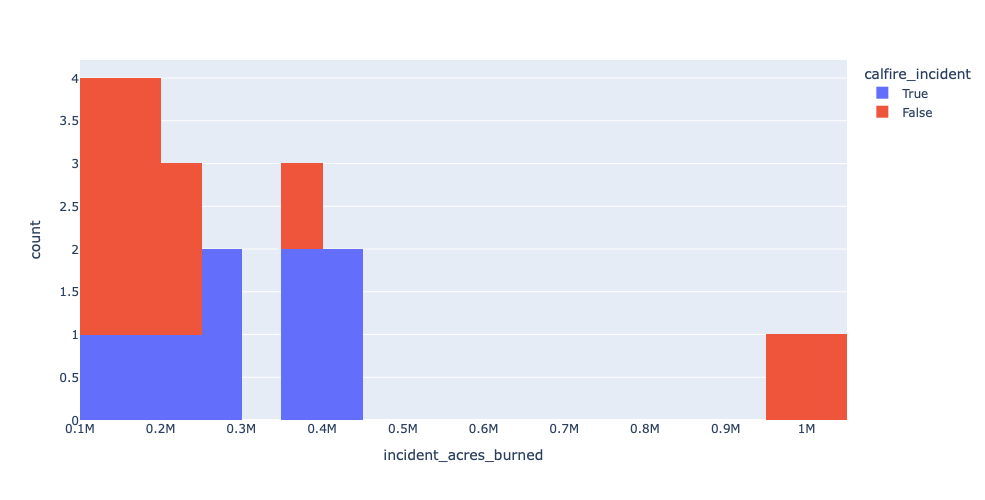

In [156]:
# Extra Code
mask = DF_raw[ 'incident_acres_burned' ] < 10000000
mask = DF_raw[ 'incident_acres_burned' ] > 100000
DF_new = DF_raw[mask]
fig = px.histogram(DF_new,
                   x = 'incident_acres_burned',
                  nbins = 20,
                  color = 'calfire_incident')
fig.update_layout(autosize = False,
                  width = 1000,
                  height = 500)
fig.show()


## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [162]:
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
show(DF_raw)

In [176]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [178]:
DF_raw.dtypes

Film           object
Year            int64
Awards         object
Nominations    object
dtype: object

In [180]:
# Your code here
DF_raw['Awards'] = DF_raw['Awards'].apply(lambda x: int(x.split('(')[0]))

In [182]:
award_data = DF_raw['Awards'].value_counts()
DF_award = award_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Awards,count
0,1,987
1,2,157
2,3,78
3,4,48
4,0,36
5,5,26
6,7,13
7,6,13
8,8,8
9,11,3


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [184]:
# Your code here
DF_raw.dtypes

Film           object
Year            int64
Awards          int64
Nominations    object
dtype: object

In [186]:
DF_raw['Nominations'] = DF_raw['Nominations'].apply(lambda x: int(x.split('[')[0]))


In [188]:
nomination_data = DF_raw['Nominations'].value_counts()
DF_award = nomination_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Nominations,count
0,1,553
1,2,141
2,4,115
3,5,104
4,3,104
5,6,80
6,7,75
7,8,61
8,10,40
9,9,31


In [190]:
DF_raw.dtypes

Film           object
Year            int64
Awards          int64
Nominations     int64
dtype: object

## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

https://en.wikipedia.org/wiki/Tony_Award_for_Best_Musical

In [277]:
my_website = "https://en.wikipedia.org/wiki/Grammy_Awards"
DF = pd.read_html(my_website)
DF_raw = DF[5]
show(DF_raw)

In [269]:
DF_raw.dtypes

Edition                  object
Date                     object
Venue                    object
Venue City               object
Host                     object
Network                  object
Viewers (in millions)    object
dtype: object

In [279]:
DF_raw['Viewers (in millions)'] = DF_raw['Viewers (in millions)'].apply(lambda x: x.replace('—','NaN'))
DF_raw['Viewers (in millions)'] = DF_raw['Viewers (in millions)'].apply(lambda x: x.replace('TBA','NaN'))
DF_raw['Viewers (in millions)']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
62     9.23[38]
63     9.59[39]
64    12.55[41]
65    16.90[42]
66          NaN
Name: Viewers (in millions), Length: 67, dtype: object

In [281]:
DF_raw['Viewers (in millions)'] = DF_raw['Viewers (in millions)'].apply(lambda x: float(x.split('[')[0]))
DF_raw['Viewers (in millions)']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
      ...  
62     9.23
63     9.59
64    12.55
65    16.90
66      NaN
Name: Viewers (in millions), Length: 67, dtype: float64

In [283]:
Viewer_data = DF_raw['Viewers (in millions)'].value_counts()
DF_award = Viewer_data.reset_index().rename(columns={"index": "value", 0: "count"})
DF_award

,Viewers (in millions),count
0,28.86,1
1,28.37,1
2,26.29,1
3,18.80,1
4,17.00,1
5,20.05,1
6,17.18,1
7,19.04,1
8,25.80,1
9,26.55,1


In [285]:
DF_raw.dtypes

Edition                   object
Date                      object
Venue                     object
Venue City                object
Host                      object
Network                   object
Viewers (in millions)    float64
dtype: object

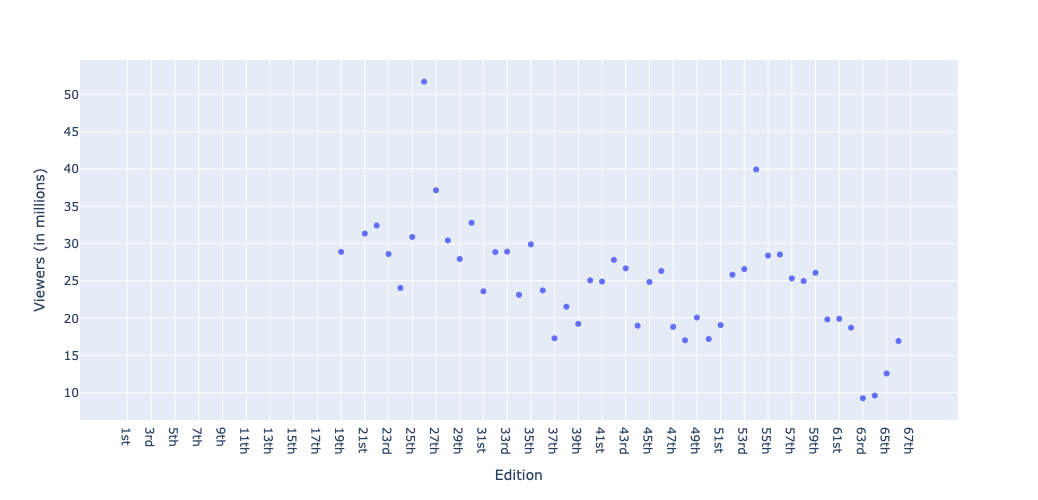

In [323]:

fig = px.scatter(DF_raw,
                   y = 'Viewers (in millions)',
                 x = 'Edition'
                 )
fig.update_layout(autosize = False,
                  width = 1000,
                  height = 500)
fig.show()
